In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import cv2

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")
!ls


image.jpg  sample_data


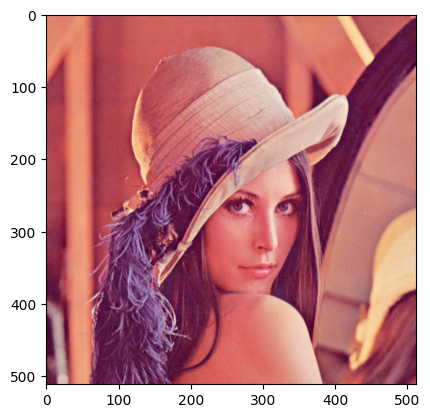

In [ ]:
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Задание 1 Чтение и отображение

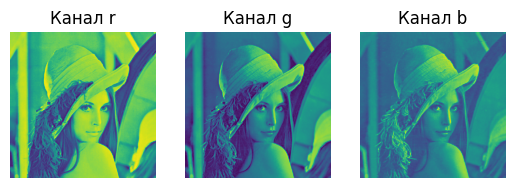

In [ ]:
# Отображение каждого канала цвета
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    plt.subplot(1, 3, i+1)
    plt.imshow(img[:,:,i])
    plt.title(f'Канал {col}')
    plt.axis('off')
plt.show()

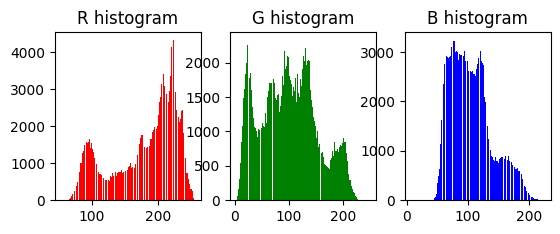

In [ ]:
# Гистограмма яркостей для каждого канала
for i, color in enumerate(colors):
    plt.subplot(2, 3, i+4)
    plt.hist(img[:, :, i].ravel(), bins=256, color=color)
    plt.title(f'{color.upper()} histogram')
plt.show()

# Задание 2 Добавление границы

In [ ]:
def add_border(image, border_size, method):
    if method == 'constant':
        color = [0, 0, 0]
        image_with_border = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=color)
    elif method == 'reflect':
        image_with_border = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REFLECT)
    elif method == 'replicate':
        image_with_border = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REPLICATE)
    else:
        print('Неверный метод')
        return None

    return image_with_border


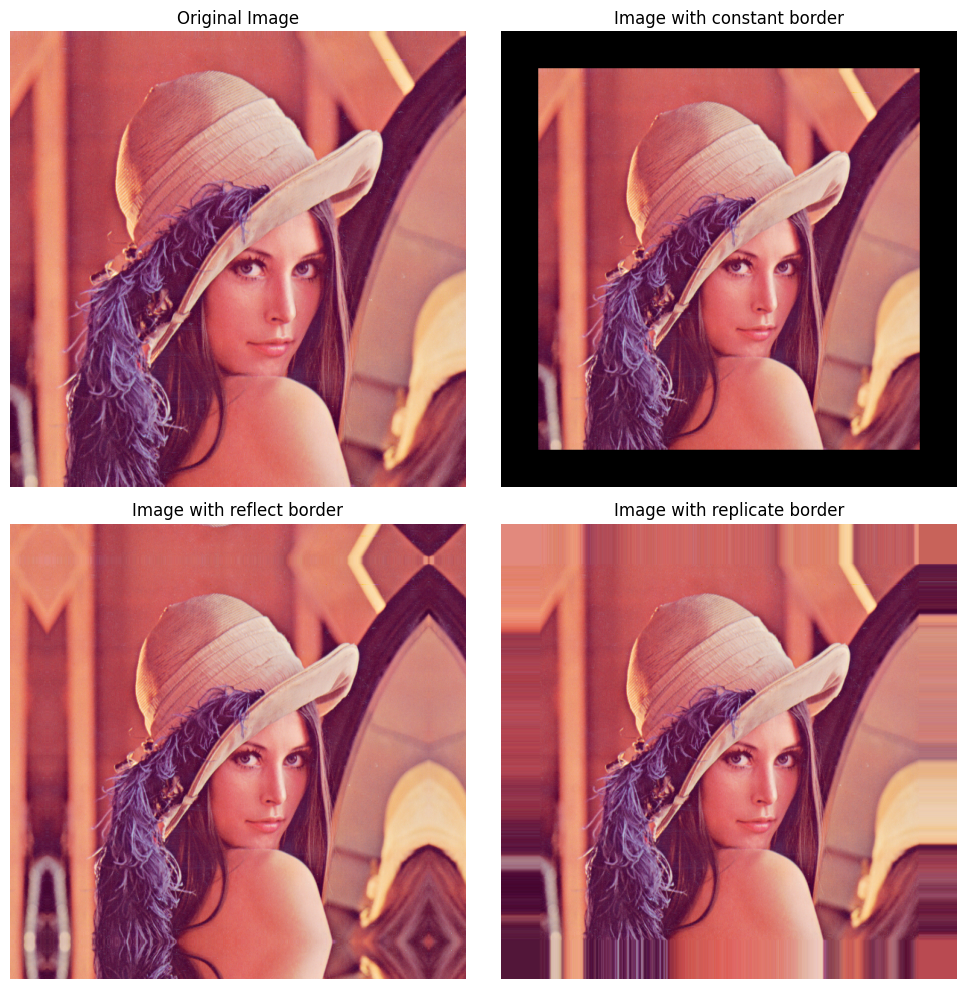

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

methods = ['constant', 'reflect', 'replicate']
for i, method in enumerate(methods):
    img_with_border = add_border(img, 50, method)
    plt.subplot(2, 2, i+2)
    plt.imshow(img_with_border)
    plt.title(f'Image with {method} border')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Задание 3 RGB  -> GRAY

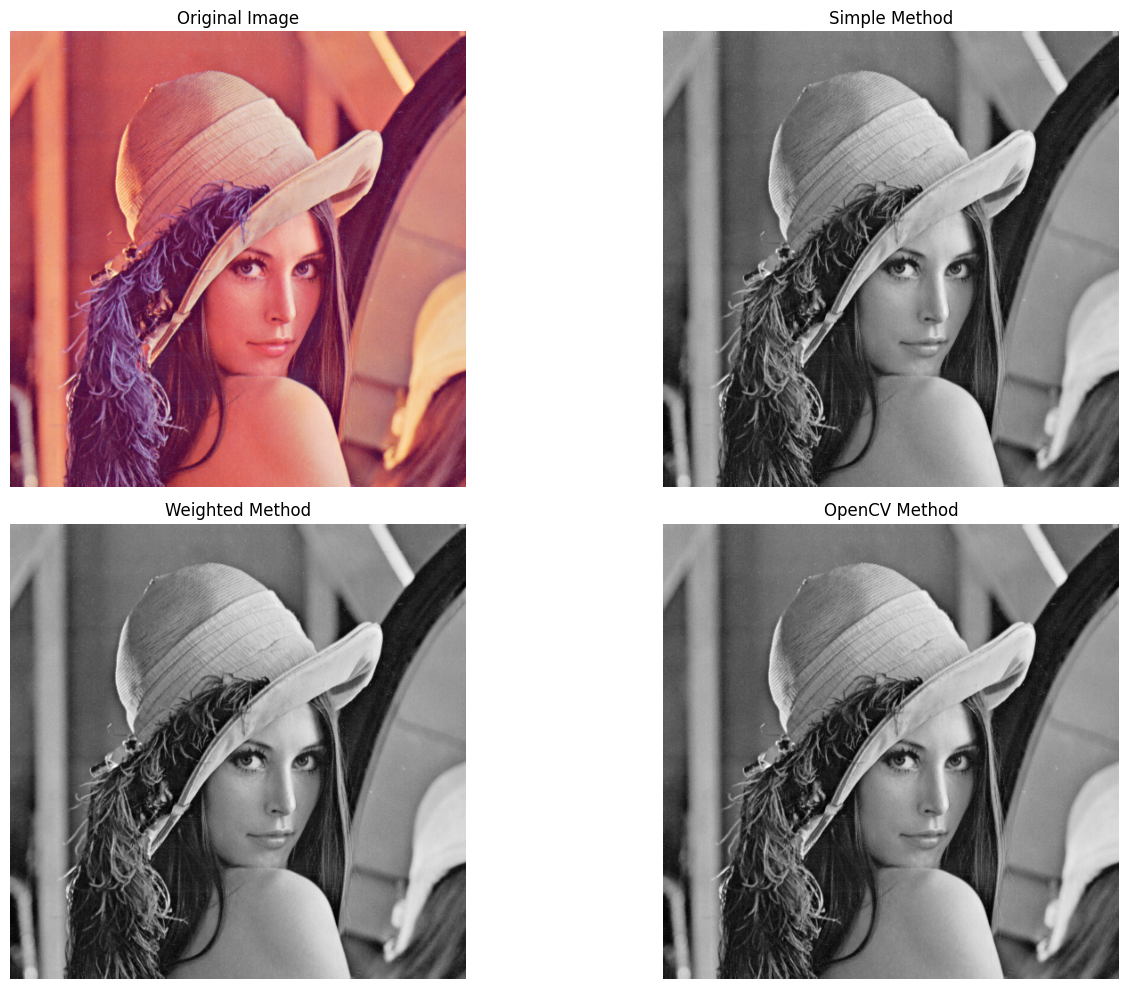

In [ ]:
gray_simple = np.mean(img, axis=2)

gray_weighted = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

gray_opencv = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_simple, cmap='gray')
plt.title('Simple Method')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gray_weighted, cmap='gray')
plt.title('Weighted Method')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gray_opencv, cmap='gray')
plt.title('OpenCV Method')
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание 4 Манипуляция с пикселями

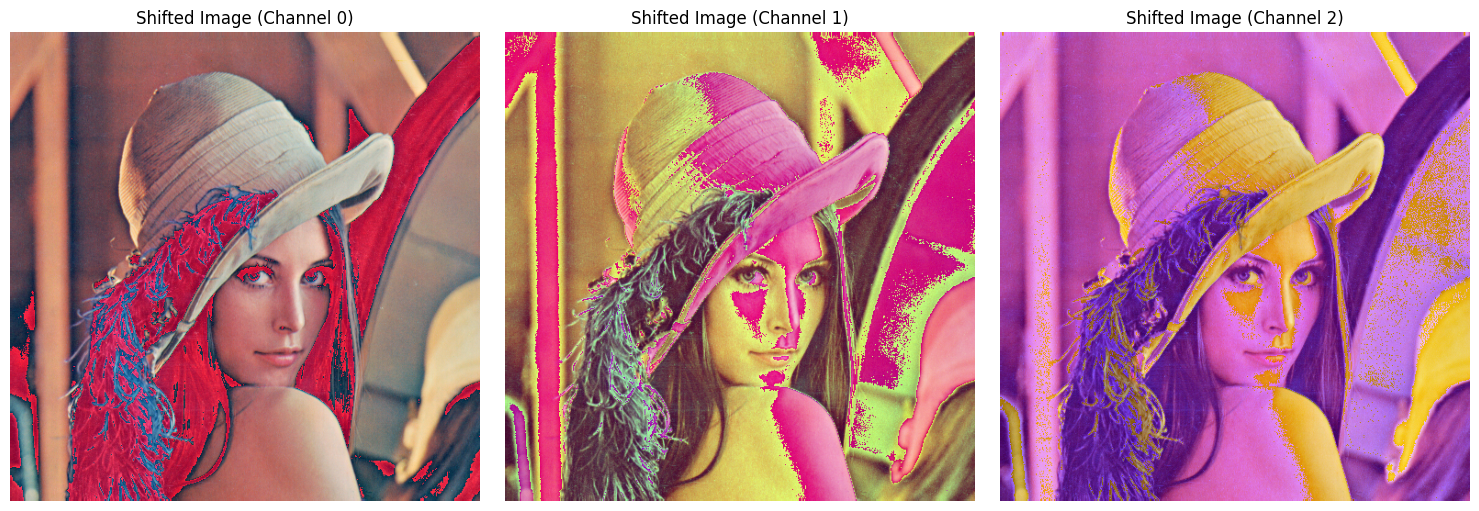

In [ ]:
def shift_image(image, channel, val):
    shifted_image = image.copy()
    shifted_image[:, :, channel] = shifted_image[:, :, channel] * val
    return shifted_image

shifted_images = [shift_image(img, channel, 2) for channel in range(3)]

plt.figure(figsize=(15, 5))
for i, shifted_image in enumerate(shifted_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(shifted_image)
    plt.title(f'Shifted Image (Channel {i})')
    plt.axis('off')
plt.tight_layout()
plt.show()

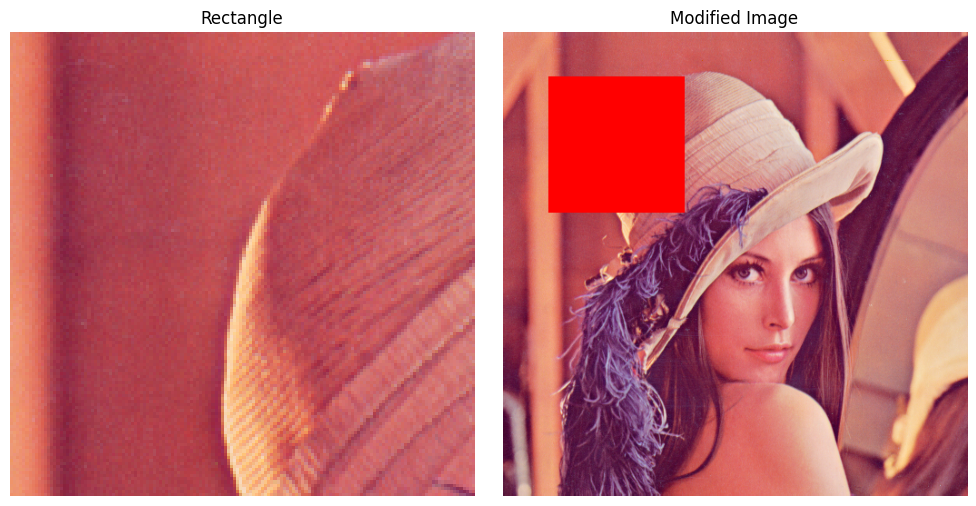

In [ ]:
def get_rect(image, rect_coord, color):
    image_copy = image.copy()
    rect = image_copy[rect_coord[0]:rect_coord[2], rect_coord[1]:rect_coord[3]].copy()
    image_copy[rect_coord[0]:rect_coord[2], rect_coord[1]:rect_coord[3]] = color
    return rect, image_copy

rect_coord = [50, 50, 200, 200]
color = [255, 0, 0]
rect, rect_image = get_rect(img, rect_coord, color)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rect)
plt.title('Rectangle')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rect_image)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание 5 RGB -> HSV

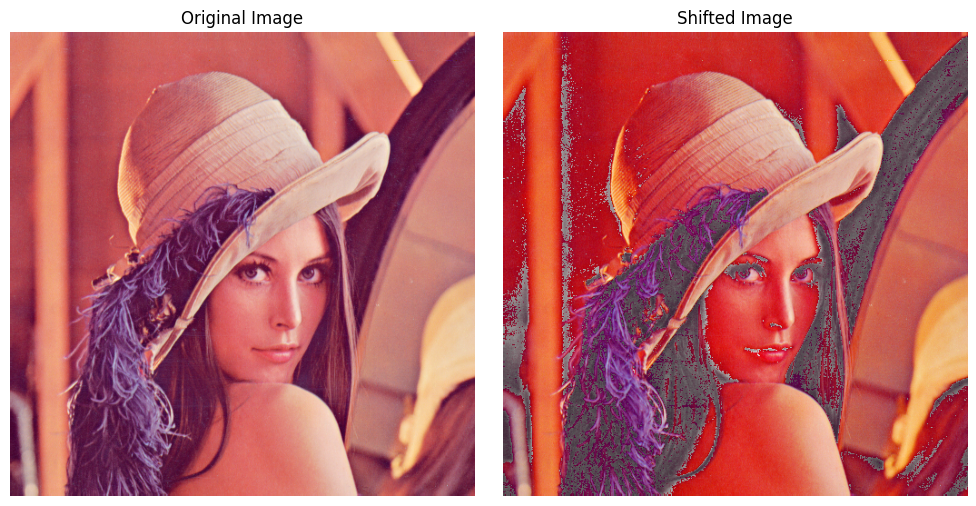

In [ ]:
hsv = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2HSV)
shifted_hsv = shift_image(hsv, 1, 1.5)
shifted_rgb = cv2.cvtColor(shifted_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(shifted_rgb)
plt.title('Shifted Image')
plt.axis('off')

plt.tight_layout()
plt.show()